https://www.kaggle.com/code/mpwolke/kpop-idols-boy-groups/

In [103]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data from CSV file

kpop_boygroups_data = pd.read_csv("kpop_idols_boy_groups.csv", parse_dates=['Debut'])
kpop_boygroups_data.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No


In [104]:
# Clean the data and create desired dataframe for the project

kpop_boygroups_data_df = kpop_boygroups_data.drop(columns=['Short', 'Korean Name', 'Fanclub Name'])
kpop_boygroups_data_df.head()

,Name,Debut,Company,Members,Orig. Memb.,Active
0,100%,2012-09-18,TOP Media,4,7,Yes
1,14U,2017-04-17,BG,14,14,Yes
2,1the9,2019-02-09,MBK,9,9,Yes
3,24K,2012-09-06,Choeun,8,6,Yes
4,2AM,2008-06-21,"JYP, Big Hit",4,4,No


In [105]:
# Show the members column only to begin analyzing that section of data

kpop_boygroups_data_df["Members"]

0       4
1      14
2       9
3       8
4       4
       ..
142     4
143    11
144     5
145     4
146     9
Name: Members, Length: 147, dtype: int64

In [106]:
# Calculate the maximum number of members current in a group

max_members = kpop_boygroups_data_df["Members"].max()
print(max_members)

18


In [107]:
# Calculate the median of the Members column

median_members = kpop_boygroups_data_df["Members"].median()
print(median_members)

5.0


In [108]:
# Calculate the minimum number of members in a group

min_members = kpop_boygroups_data_df["Members"].min()
print(min_members)

2


In [109]:
# Show the original members column only to begin analyzing that section of data

kpop_boygroups_data_df["Orig. Memb."]

0       7
1      14
2       9
3       6
4       4
       ..
142     4
143    11
144     5
145     5
146     9
Name: Orig. Memb., Length: 147, dtype: int64

In [110]:
# Calculate the most amount of original members in a group

max_original = kpop_boygroups_data_df["Orig. Memb."].max()
print(max_original)

18


In [111]:
# Calculate the median amount of original members in a group

median_original = kpop_boygroups_data_df["Orig. Memb."].median()
print(median_original)

6.0


In [112]:
# Calculate the minimum amount of original members in a group

min_original = kpop_boygroups_data_df["Orig. Memb."].min()
print(min_original)

2


In [113]:
# Show the debut column only to analyze that data

kpop_boygroups_data_df["Debut"]

0     2012-09-18
1     2017-04-17
2     2019-02-09
3     2012-09-06
4     2008-06-21
         ...    
142   2016-06-12
143   2017-08-07
144   2019-05-27
145   2014-08-12
146   2010-01-07
Name: Debut, Length: 147, dtype: datetime64[ns]

In [114]:
# Calculate median debut date of a group

median_debut = kpop_boygroups_data_df["Debut"].median()
print(median_debut)

2015-05-26 00:00:00


In [115]:
# Calculate most frequent debut dates for groups

mode_debut = kpop_boygroups_data_df["Debut"].mode()
print(mode_debut)

0   2009-10-14
1   2014-07-09
2   2015-05-20
3   2016-02-23
Name: Debut, dtype: datetime64[ns]


In [116]:
# Pull out the company data column

kpop_boygroups_data_df["Company"]

0         TOP Media
1                BG
2               MBK
3            Choeun
4      JYP, Big Hit
           ...     
142             RBW
143             YMC
144           Choon
145              YG
146     Star Empire
Name: Company, Length: 147, dtype: object

In [117]:
# Calculate the company who has debuted the most groups

mode_company = kpop_boygroups_data_df["Company"].mode()
print(mode_company)

0    SM
Name: Company, dtype: object


In [118]:
# Analyze if any companies have only debuted one group



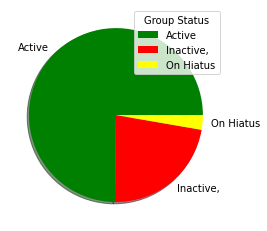

In [119]:
# Plot the current statuses of groups to determine how many are active vs. how many are not or are on hiatus

group_status=['Active', 'Inactive', 'On Hiatus']
group_values=[110,33,4]

plt.pie(group_values, labels=group_status, startangle=0, explode=[0,0,0], shadow=True, colors=['green', 'red', 'yellow'])

plt.legend(title='Group Status')
plt.show()